In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx


In [90]:
df=pd.read_excel('/kaggle/input/bank-loan-modelling/Bank_Personal_Loan_Modelling.xlsx','Data')
df.head()


0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: Personal Loan, Length: 5000, dtype: bool

All the feature all numerical so we dont need to perform any kind of transformation

Checking if the data has null values or not

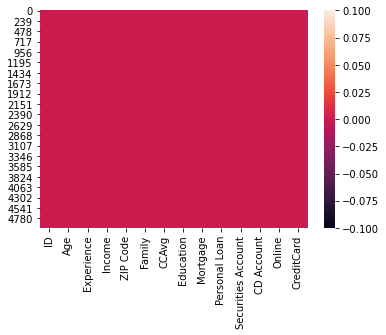

In [3]:
import seaborn as sns
sns.heatmap(df.isnull())

So as par the heatmap there are no null values in the data

In [4]:
df.shape

(5000, 14)

In [5]:
X=pd.DataFrame(columns=['Age','Experience','Income','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','CreditCard','Online'],data=df)

In [6]:
Y=df['Personal Loan']

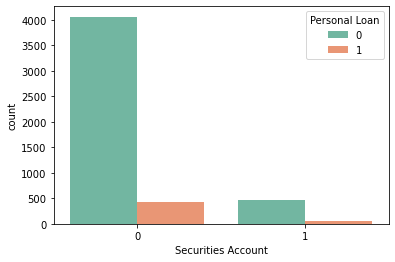

In [55]:
sns.countplot(data=df,x='Securities Account',hue='Personal Loan',palette='Set2')


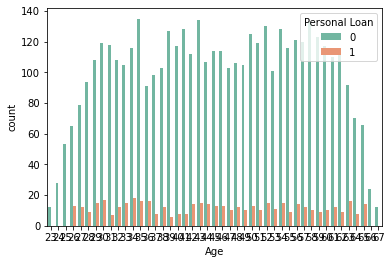

In [56]:
sns.countplot(data=df,x='Age',hue='Personal Loan',palette='Set2')

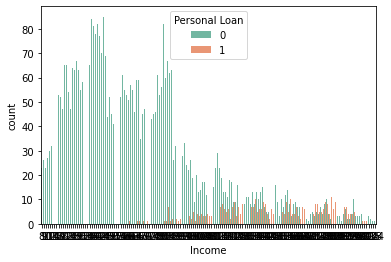

In [58]:
sns.countplot(data=df,x='Income',hue='Personal Loan',palette='Set2')
plt.show()

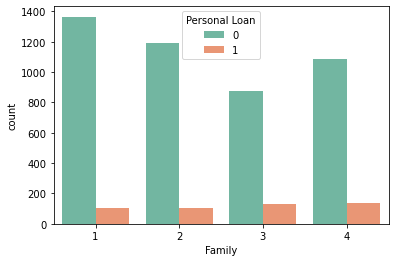

In [59]:
sns.countplot(data=df,x='Family',hue='Personal Loan',palette='Set2')

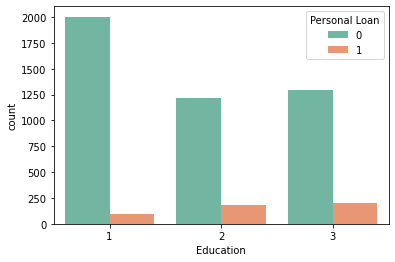

In [60]:
sns.countplot(data=df,x='Education',hue='Personal Loan',palette='Set2')

Now we will see feature correlation to help us choose the best features for training the model

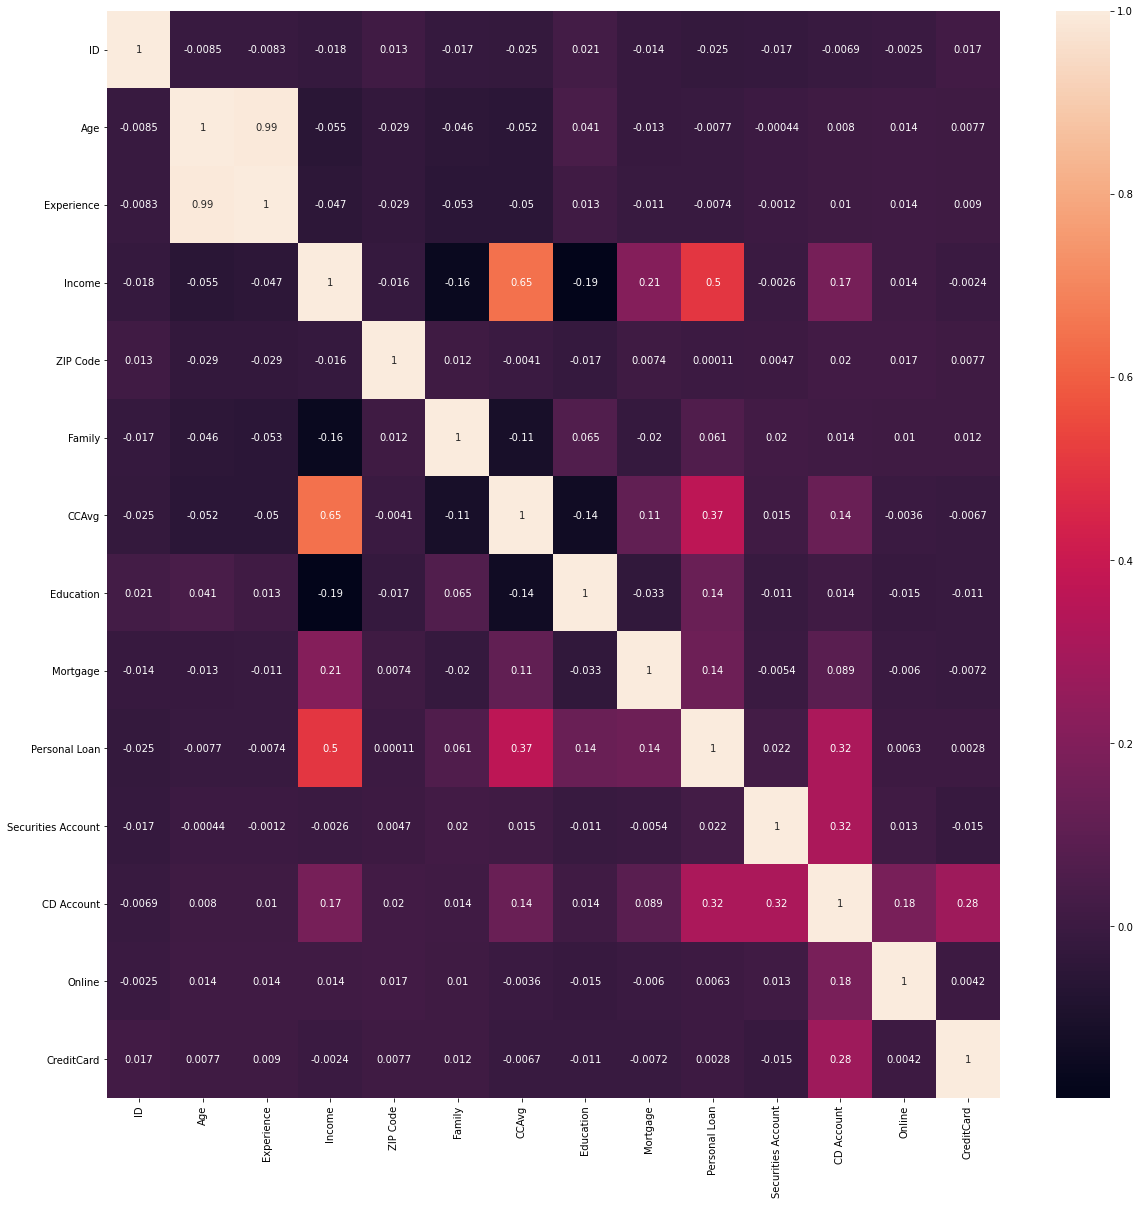

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df[df.corr().index].corr(),annot=True)
plt.show()

[0.04308755 0.04329799 0.35279365 0.09631229 0.16420772 0.15049281
 0.03317559 0.01007186 0.07605708 0.01744196 0.0130615 ]


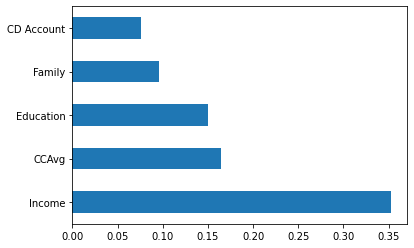

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_impo=pd.Series(model.feature_importances_,index=X.columns)
feat_impo.nlargest(5).plot(kind='barh')

As we can see features mentioned in the graph are the top features which we will use

In [82]:
X=pd.DataFrame(columns=['Family','CCAvg','Education','Income','CD Account'],data=df)
X.head()

,Family,CCAvg,Education,Income,CD Account
0,4,1.6,1,49,0
1,3,1.5,1,34,0
2,1,1.0,1,11,0
3,1,2.7,2,100,0
4,4,1.0,2,45,0


In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=100)


,Family,CCAvg,Education,Income,CD Account
789,4,0.3,2,31,0
2507,4,2.1,1,60,0
2376,3,0.2,1,23,0
1378,4,0.1,3,34,0
598,2,0.2,3,11,0


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
grid_search = GridSearchCV(DT, param_grid,scoring="accuracy", n_jobs=-1, cv=10)
grid_result = grid_search.fit(X_train,Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

range(1, 11, 2)
Best: 0.985143 using {'max_depth': 5}


In [75]:
DT=DecisionTreeClassifier(max_depth=5)

In [76]:

DT.fit(X_train,Y_train)


DecisionTreeClassifier(max_depth=5)

In [78]:
Y_pred=DT.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1342
           1       0.96      0.87      0.91       158

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [80]:
print(confusion_matrix(Y_test,Y_pred))

[[1336    6]
 [  20  138]]
